In [1]:
from zapcosmics.timeseries import OmniscientSubcadenceTimeseries
from zapcosmics.strategies import central
from zapcosmics.models import Transit
import matplotlib.pyplot as plt, numpy as np
%matplotlib inline

In [34]:
s = central(10)
def f(t):
    return 0.0005*np.sin(t*10)
t = OmniscientSubcadenceTimeseries(model=f, cadence=1800, cosmickw=dict(probability=0.001))

In [35]:
b = t.stack(s)

900

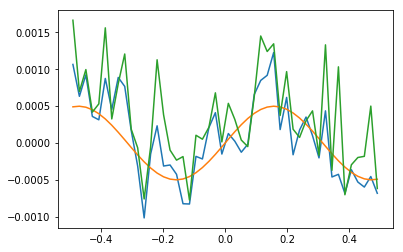

In [37]:
import matplotlib.pyplot as plt

plt.plot(b['time'], b['flux'])
plt.plot(b['time'], b['model'])
plt.plot(b['time'], b['unmitigated'])
#plt.plot(b['time'], b['cosmics'] + b['model'])


t.cosmics
t.nsubcadences